In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tf_explain.core.activations import ExtractActivations
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline

# Model Creation

In [2]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':299, 'width':299, 'channels':3}

In [3]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [10]:
# Create a Deepfake Model class using the Classifier

class DeepfakeModel(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'binary_crossentropy',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        xModel=tf.keras.applications.xception.Xception(weights='imagenet',include_top=False, pooling='avg', input_shape = (299, 299, 3))

        count = 0
        for layer in xModel.layers:
            layer.trainable = False
            count += 1
            if count == 36:
                break
        
        output = Dense(1, activation='sigmoid')(xModel.output)

        return Model(xModel.input, output)

# Model Training

In [11]:
# Instantiate a Deepfake model with pretrained weights
rgb = DeepfakeModel()

In [12]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # set validation split

datapath_train = r"C:\Users\JAR\Github_learn\archive (2)\Dataset\Train"

datapath_valid = r"C:\Users\JAR\Github_learn\archive (2)\Dataset\Validation"

# Instantiating generator to feed images through the network
train_generator = train_datagen.flow_from_directory(
    datapath_train,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    datapath_train, # same directory as training data
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='validation') # set as validation data

Found 112002 images belonging to 2 classes.
Found 28000 images belonging to 2 classes.


In [ ]:
# this path edited by me.
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # set validation split 

path = r"
# Instantiating generator to feed images through the network
train_generator = train_datagen.flow_from_directory(
    './Dataset/RGB/',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

In [13]:
# Checking class assignment
train_generator.class_indices

{'Fake': 0, 'Real': 1}

In [ ]:
hist = rgb.model.fit(
    train_generator,
    steps_per_epoch = 160,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 40
)

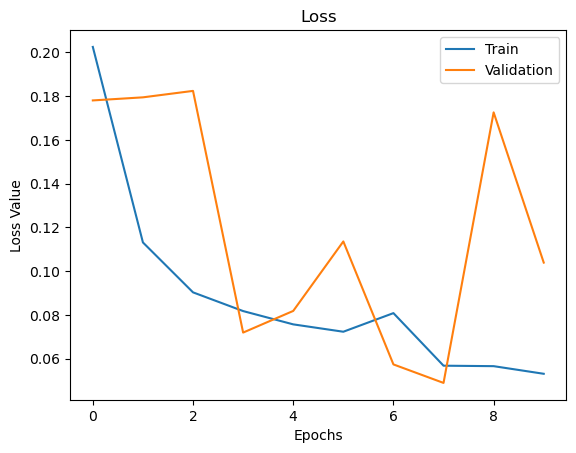

In [24]:
plt.plot(hist.epoch, hist.history['loss'], label = "Train")
plt.plot(hist.epoch, hist.history['val_loss'], label = "Validation")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.savefig(r"C:\Users\JAR\Github_learn\my_trying\Xception_deepfake\Plots\xception_trainV1",dpi = 300)
plt.show()


In [17]:
rgb.model.save(r"C:\Users\JAR\Github_learn\my_trying\Xception_deepfake\models\xception_model_v1.keras")

# Model Evaluation

In [4]:
model = load_model(r"C:\Users\JAR\Github_learn\my_trying\Xception_deepfake_trainV1\models\xception_model_v1.keras")

C:\Users\JAR\miniconda3\envs\_ML1\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 119 variables whereas the saved optimizer has 236 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
# evaluating the test set.

dataGenerator = ImageDataGenerator(rescale=1./255)

test_path = r"C:\Users\JAR\Github_learn\archive (2)\Dataset\Test"

generator = dataGenerator.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=1,
    class_mode='binary')

Found 10905 images belonging to 2 classes.


(1, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted likelihood: 0.0207
Actual label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Correct prediction: True


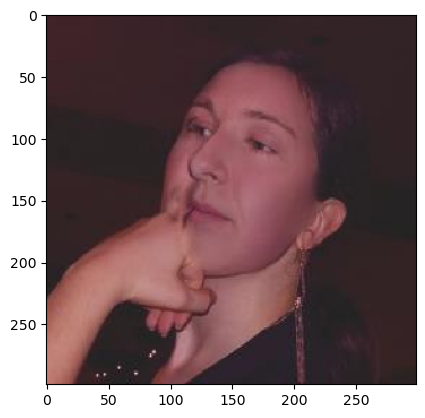

In [11]:
# Rendering image X with label y for XceptionNet

X, y = next(generator);
print(X.shape);

# Evaluating prediction
print(f"Predicted likelihood: {model.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(model.predict(X)[0][0])==y[0]}");

# Showing image
plt.imshow(np.squeeze(X));

In [ ]:
y_pred = []
y_act = []

# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = next(generator)
    pred = model.predict(X)[0][0];
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        y_pred.append(1)
        y_act.append(1)
    elif round(pred)==y[0] and y[0]==0:
        y_pred.append(0)
        y_act.append(0)
    elif y[0]==1:
        y_pred.append(0)
        y_act.append(1)
    else:
        y_pred.append(1)
        y_act.append(0)
    
print("All predictions completed")
        
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━

In [14]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      5293
           1       0.86      0.94      0.90      5226

    accuracy                           0.89     10519
   macro avg       0.90      0.89      0.89     10519
weighted avg       0.90      0.89      0.89     10519



In [13]:
cm = confusion_matrix(y_act, y_pred)
print(cm)

[[4493  800]
 [ 321 4905]]


<Axes: >

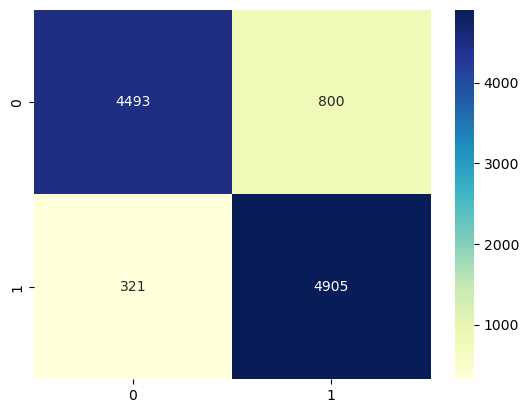

In [15]:
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")

In [16]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]
            
accuracy = correct/sum(sum(cm))
print("Model Accuracy =", accuracy)

Model Accuracy = 0.8934309344994772
